In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_csv('MAFAT_Radar_Challenge.csv')

print("\nSample data:")
data.head()


Sample data:


,segment_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,target_type
0,1,D,7,12,LowSNR,3,human
1,2,C,5,5,HighSNR,4,human
2,3,C,5,5,HighSNR,4,human
3,4,C,5,5,HighSNR,4,human
4,5,C,5,5,HighSNR,4,human


In [2]:
data.dtypes

segment_id           int64
geolocation_type    object
geolocation_id       int64
sensor_id            int64
snr_type            object
date_index           int64
target_type         object
dtype: object

Our data is pretty clean, no missing values.

In [3]:
data.isnull().any()

segment_id          False
geolocation_type    False
geolocation_id      False
sensor_id           False
snr_type            False
date_index          False
target_type         False
dtype: bool

The data contains 106,610 radar tracks and 7 features

In [4]:
data.shape

(106610, 7)

describe() method will give us some basic summary statistics about various fields of the dataset. Let's run some summary statistics to get an insight into what we are dealing with:

In [5]:
data.describe()

,segment_id,geolocation_id,sensor_id,date_index
count,106610.000000,106610.000000,106610.000000,106610.000000
mean,53305.500000,5.847669,8.845005,4.379777
std,30775.800436,1.262765,3.195269,5.133699
min,1.000000,1.000000,1.000000,2.000000
25%,26653.250000,5.000000,6.000000,2.000000
50%,53305.500000,6.000000,9.000000,3.000000
75%,79957.750000,7.000000,12.000000,4.000000
max,106610.000000,7.000000,13.000000,33.000000


In [6]:
data['target_type'].unique()

array(['human', 'animal'], dtype=object)

In [7]:
import numpy as np
data['target_type']=np.where(data['target_type'] =='human', 1, data['target_type'])
data['target_type']=np.where(data['target_type'] =='animal', 0, data['target_type'])

In [8]:
data=data.rename(columns = {'target_type':'y'})

In [9]:
print(data['y'].unique())

[1 0]


## Data Exploring

In [10]:
data['y'].value_counts()

1    99199
0     7411
Name: y, dtype: int64

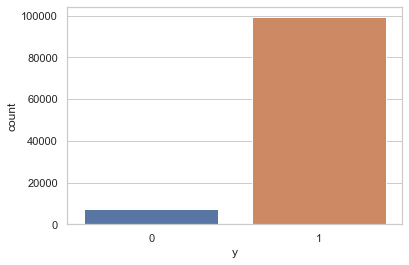

In [11]:
sns.countplot(x='y', data=data)
plt.show()

In [12]:
data.groupby('geolocation_type').mean()

,segment_id,geolocation_id,sensor_id,date_index
geolocation_type,,,,
A,92346.498676,2.927035,2.927035,14.490900
C,35454.317052,4.779098,5.585364,5.238992
D,57333.116350,6.534644,10.686914,3.169066


In [13]:
data.groupby('geolocation_type').mean()

,segment_id,geolocation_id,sensor_id,date_index
geolocation_type,,,,
A,92346.498676,2.927035,2.927035,14.490900
C,35454.317052,4.779098,5.585364,5.238992
D,57333.116350,6.534644,10.686914,3.169066


In [14]:
data.groupby('geolocation_id').mean()

,segment_id,sensor_id,date_index
geolocation_id,,,
1,81337.713844,1.000000,26.435105
2,78782.367347,2.000000,14.358277
3,93414.102088,3.000000,14.501339
4,83413.996573,4.000000,30.989719
5,32772.260116,5.853396,4.000000
6,46650.803390,9.037516,2.000000
7,63902.200995,12.082275,3.000000


In [15]:
data.groupby('sensor_id').mean()

,segment_id,geolocation_id,date_index
sensor_id,,,
1,81337.713844,1.0,26.435105
2,78782.367347,2.0,14.358277
3,93414.102088,3.0,14.501339
4,83413.996573,4.0,30.989719
5,28623.198972,5.0,4.000000
6,33625.245353,5.0,4.000000
7,38080.161381,5.0,4.000000
8,42284.741410,6.0,2.000000
9,46407.216953,6.0,2.000000


In [16]:
data.groupby('snr_type').mean()

,segment_id,geolocation_id,sensor_id,date_index
snr_type,,,,
HighSNR,28004.981566,5.966629,9.088222,3.874555
LowSNR,96299.937861,3.348472,3.735343,14.993807
SynthSNR,74513.000000,5.966629,9.088222,3.874555


In [17]:
data.groupby('date_index').mean()

,segment_id,geolocation_id,sensor_id
date_index,,,
2,46650.803390,6.000000,9.037516
3,63902.200995,7.000000,12.082275
4,32772.260116,5.000000,5.853396
5,76750.600000,2.000000,2.000000
6,91551.716763,2.791908,2.791908
7,92993.605341,2.842730,2.842730
8,87590.997908,2.941423,2.941423
9,91344.031746,2.738095,2.738095
10,95728.790614,3.000000,3.000000


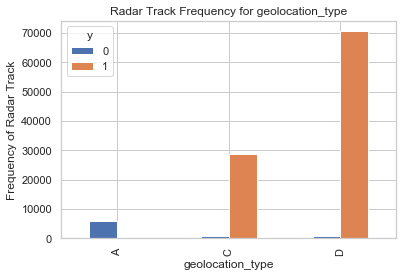

In [18]:
pd.crosstab(data.geolocation_type,data.y).plot(kind='bar')
plt.title('Radar Track Frequency for geolocation_type')
plt.xlabel('geolocation_type')
plt.ylabel('Frequency of Radar Track')
plt.savefig('geolocation_type_chart')

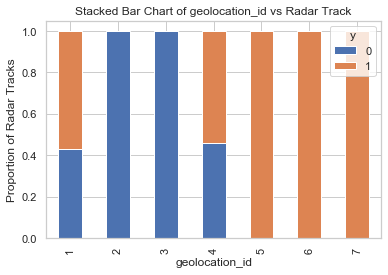

In [19]:
table=pd.crosstab(data.geolocation_id, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of geolocation_id vs Radar Track')
plt.xlabel('geolocation_id')
plt.ylabel('Proportion of Radar Tracks')
plt.savefig('geolocation_id_chart')

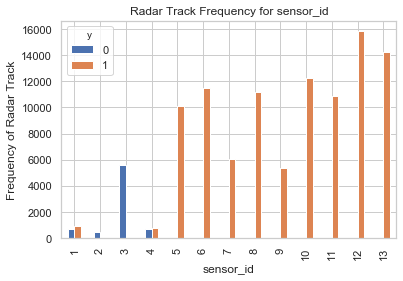

In [20]:
pd.crosstab(data.sensor_id,data.y).plot(kind='bar')
plt.title('Radar Track Frequency for sensor_id')
plt.xlabel('sensor_id')
plt.ylabel('Frequency of Radar Track')
plt.savefig('sensor_id_chart')

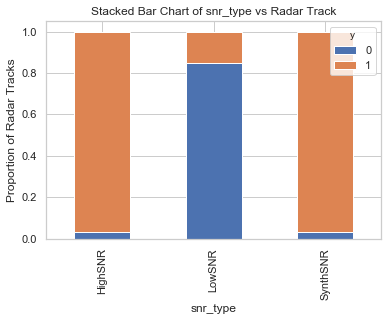

In [21]:
table=pd.crosstab(data.snr_type, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of snr_type vs Radar Track')
plt.xlabel('snr_type')
plt.ylabel('Proportion of Radar Tracks')
plt.savefig('snr_type_chart')

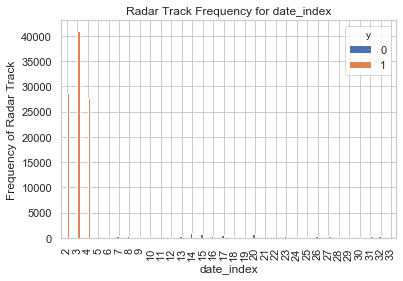

In [22]:
pd.crosstab(data.date_index,data.y).plot(kind='bar')
plt.title('Radar Track Frequency for date_index')
plt.xlabel('date_index')
plt.ylabel('Frequency of Radar Track')
plt.savefig('date_index_chart')

### Create dummy variables for categorical variables

There are five categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [23]:
data.head()

,segment_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,y
0,1,D,7,12,LowSNR,3,1
1,2,C,5,5,HighSNR,4,1
2,3,C,5,5,HighSNR,4,1
3,4,C,5,5,HighSNR,4,1
4,5,C,5,5,HighSNR,4,1


In [24]:
cat_vars=['geolocation_type','geolocation_id','sensor_id','snr_type','date_index']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [25]:
data.head()

,segment_id,geolocation_type,geolocation_id,sensor_id,snr_type,date_index,y,geolocation_type_A,geolocation_type_C,geolocation_type_D,...,date_index_24,date_index_25,date_index_26,date_index_27,date_index_28,date_index_29,date_index_30,date_index_31,date_index_32,date_index_33
0,1,D,7,12,LowSNR,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,C,5,5,HighSNR,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,C,5,5,HighSNR,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,C,5,5,HighSNR,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,C,5,5,HighSNR,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The actual categorical variable needs to be removed once the dummy variables have been created.

In [26]:
data.drop(['geolocation_type','geolocation_id','sensor_id','snr_type','date_index'], axis=1, inplace=True)

In [27]:
data.columns.values

array(['segment_id', 'y', 'geolocation_type_A', 'geolocation_type_C',
       'geolocation_type_D', 'geolocation_id_1', 'geolocation_id_2',
       'geolocation_id_3', 'geolocation_id_4', 'geolocation_id_5',
       'geolocation_id_6', 'geolocation_id_7', 'sensor_id_1',
       'sensor_id_2', 'sensor_id_3', 'sensor_id_4', 'sensor_id_5',
       'sensor_id_6', 'sensor_id_7', 'sensor_id_8', 'sensor_id_9',
       'sensor_id_10', 'sensor_id_11', 'sensor_id_12', 'sensor_id_13',
       'snr_type_HighSNR', 'snr_type_LowSNR', 'snr_type_SynthSNR',
       'date_index_2', 'date_index_3', 'date_index_4', 'date_index_5',
       'date_index_6', 'date_index_7', 'date_index_8', 'date_index_9',
       'date_index_10', 'date_index_11', 'date_index_12', 'date_index_13',
       'date_index_14', 'date_index_15', 'date_index_16', 'date_index_17',
       'date_index_18', 'date_index_19', 'date_index_20', 'date_index_21',
       'date_index_22', 'date_index_23', 'date_index_24', 'date_index_25',
       'date_index

In [28]:
data_final=data.copy()
data_final.drop(['segment_id'], axis=1, inplace=True)

In [29]:
y = data_final.loc[:, data_final.columns == 'y']
y=y.astype('int')
y.head()

,y
0,1
1,1
2,1
3,1
4,1


In [30]:
X = data_final.loc[:, data_final.columns != 'y']
X.head()

,geolocation_type_A,geolocation_type_C,geolocation_type_D,geolocation_id_1,geolocation_id_2,geolocation_id_3,geolocation_id_4,geolocation_id_5,geolocation_id_6,geolocation_id_7,...,date_index_24,date_index_25,date_index_26,date_index_27,date_index_28,date_index_29,date_index_30,date_index_31,date_index_32,date_index_33
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 30)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
  True  True  True False  True  True  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  4  8  3  7  5  6  1
  1  1  1  1  1 26 18 14 12 19 24 28 27 21 10  9 20 16 25 13 15 17 29 22
  1  1  1 11  1  1  1 23  1  1]


In [32]:
sf_X2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,geolocation_type_A,1
54,date_index_30,1
53,date_index_29,1
52,date_index_28,1
50,date_index_26,1
49,date_index_25,1
48,date_index_24,1
56,date_index_32,1
27,date_index_3,1
26,date_index_2,1


In [33]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['geolocation_type_A', 'geolocation_type_C', 'geolocation_type_D', 'geolocation_id_1', 'geolocation_id_2', 'geolocation_id_3', 'geolocation_id_4', 'geolocation_id_5', 'geolocation_id_6', 'geolocation_id_7', 'sensor_id_1', 'sensor_id_2', 'sensor_id_3', 'sensor_id_4', 'sensor_id_5', 'sensor_id_6', 'snr_type_HighSNR', 'snr_type_LowSNR', 'snr_type_SynthSNR', 'date_index_2', 'date_index_3', 'date_index_4', 'date_index_24', 'date_index_25', 'date_index_26', 'date_index_28', 'date_index_29', 'date_index_30', 'date_index_32', 'date_index_33']
30


In [34]:
X=data_final[cols]

### Logistic regression model

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(random_state=47)
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=47, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.9937


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=47)
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [39]:
print('Random Forest Accuracy: {:.4f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.9935


### Support Vector Machine

In [40]:
from sklearn.svm import SVC
svc = SVC(random_state=47)
svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=47, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
print('Support vector machine accuracy: {:.4f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.9935


Logistic regression won, right?

In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=47)
modelCV = LogisticRegression(random_state=47)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

10-fold cross validation average accuracy: 0.994


### Precision and recall

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2473
           1       1.00      1.00      1.00     32709

    accuracy                           0.99     35182
   macro avg       0.97      0.98      0.98     35182
weighted avg       0.99      0.99      0.99     35182



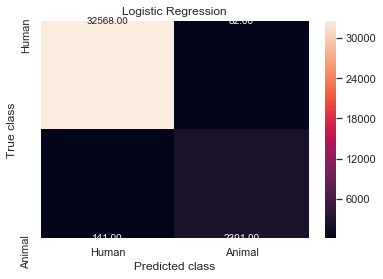

In [44]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
logreg_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Human", "Animal"] , yticklabels = ["Human", "Animal"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [45]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
print(confusion_matrix_logreg)

[[ 2391    82]
 [  141 32568]]


In [46]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2473
           1       1.00      1.00      1.00     32709

    accuracy                           0.99     35182
   macro avg       0.97      0.98      0.98     35182
weighted avg       0.99      0.99      0.99     35182



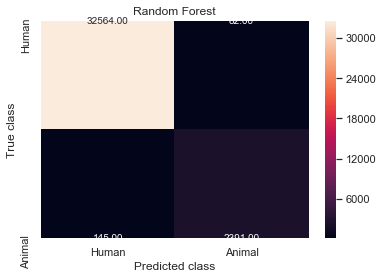

In [47]:
forest_y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(forest_y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Human", "Animal"] , yticklabels = ["Human", "Animal"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [48]:
confusion_matrix_forest = confusion_matrix(y_test, forest_y_pred)
print(confusion_matrix_forest)

[[ 2391    82]
 [  145 32564]]


In [49]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2473
           1       1.00      1.00      1.00     32709

    accuracy                           0.99     35182
   macro avg       0.97      0.98      0.98     35182
weighted avg       0.99      0.99      0.99     35182



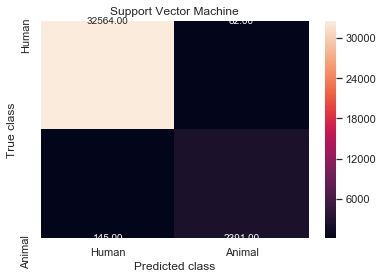

In [50]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Human", "Animal"] , yticklabels = ["Human", "Animal"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [51]:
confusion_matrix_svc = confusion_matrix(y_test, svc_y_pred)
print(confusion_matrix_svc)

[[ 2391    82]
 [  145 32564]]


When a human passed, how often does my classifier predict that correctly? This measurement is called "recall" and a quick look at these diagrams can demonstrate that logistic regression is clearly best for this criteria. Out of all the track cases, logistic regression correctly retrieved 32568 out of 32709. This translates to a turnover "recall" of about 99.57% (32568/32709).

When a classifier predicts a radar track as a human, how often does that track is actually a human? This measurement is called "precision". logistic regression has a 93.16% precision (32568 out of 34959).

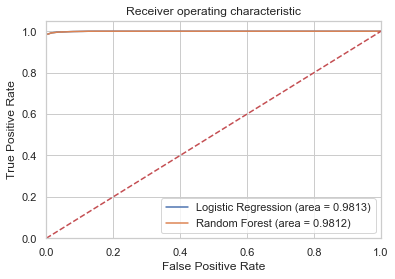

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.4f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [53]:
feature_labels = np.array(cols)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

geolocation_type_A - 27.31%
sensor_id_3 - 19.67%
geolocation_id_3 - 16.87%
snr_type_LowSNR - 9.03%
date_index_4 - 3.60%
geolocation_type_D - 3.44%
geolocation_type_C - 3.29%
geolocation_id_4 - 1.56%
geolocation_id_1 - 1.55%
sensor_id_4 - 1.45%
geolocation_id_2 - 1.42%
sensor_id_2 - 1.28%
sensor_id_1 - 1.25%
date_index_2 - 1.13%
date_index_30 - 1.13%
date_index_32 - 1.06%
geolocation_id_5 - 0.97%
date_index_26 - 0.82%
geolocation_id_7 - 0.66%
date_index_24 - 0.46%
geolocation_id_6 - 0.34%
snr_type_HighSNR - 0.33%
date_index_25 - 0.27%
snr_type_SynthSNR - 0.26%
date_index_3 - 0.22%
date_index_28 - 0.20%
date_index_29 - 0.18%
sensor_id_5 - 0.13%
date_index_33 - 0.08%
sensor_id_6 - 0.04%
